# 作業:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))

# 資料預處理

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [3]:
#指定測試集與訓練資料集
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [4]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [5]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense

In [7]:
#-- 建立模型 -----------------------------

#宣告採用序列模型
model = Sequential()

#建構輸入層
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

#建構輸出層
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


# 訓練模型

In [8]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [9]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 11s 220us/step - loss: 0.2692 - acc: 0.9223 - val_loss: 0.1323 - val_acc: 0.9620
Epoch 2/10
48000/48000 [==============================] - 17s 361us/step - loss: 0.1075 - acc: 0.9683 - val_loss: 0.1065 - val_acc: 0.9684
Epoch 3/10
48000/48000 [==============================] - 9s 192us/step - loss: 0.0707 - acc: 0.9786 - val_loss: 0.0945 - val_acc: 0.9716
Epoch 4/10
48000/48000 [==============================] - 10s 217us/step - loss: 0.0508 - acc: 0.9846 - val_loss: 0.0812 - val_acc: 0.9754
Epoch 5/10
48000/48000 [==============================] - 9s 180us/step - loss: 0.0370 - acc: 0.9883 - val_loss: 0.0781 - val_acc: 0.9761
Epoch 6/10
48000/48000 [==============================] - 9s 184us/step - loss: 0.0260 - acc: 0.9919 - val_loss: 0.0764 - val_acc: 0.9778
Epoch 7/10
48000/48000 [==============================] - 10s 205us/step - loss: 0.0193 - acc: 0.9946 - val_loss: 0.090

# 以圖形顯示訓練過程

In [10]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

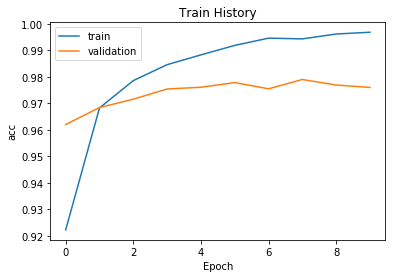

In [11]:
show_train_history(train_history,'acc','val_acc')

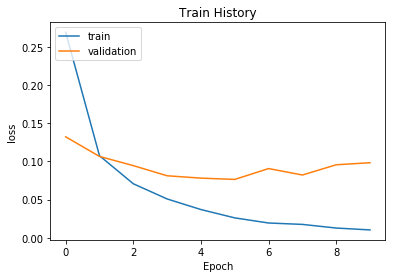

In [12]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [13]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

score_0 = scores[1]

10000/10000 [==============================] - 0s 44us/step

accuracy= 0.9762


----

# 作業:

## 訓練模型新增一層
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))

In [14]:
from keras.layers import Dense, Dropout, Activation, Flatten

#-- 建立模型 -----------------------------

#宣告採用序列模型
model = Sequential()

#建構輸入層
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

#新增層
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))

#建構輸出層
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))
#model.add(Dense(10))
#model.add(Activation('softmax'))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________
None


In [15]:
# 訓練模型
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 13s 264us/step - loss: 0.2380 - acc: 0.9295 - val_loss: 0.1455 - val_acc: 0.9543
Epoch 2/10
48000/48000 [==============================] - 11s 233us/step - loss: 0.0939 - acc: 0.9709 - val_loss: 0.0960 - val_acc: 0.9702
Epoch 3/10
48000/48000 [==============================] - 11s 237us/step - loss: 0.0639 - acc: 0.9798 - val_loss: 0.0930 - val_acc: 0.9738
Epoch 4/10
48000/48000 [==============================] - 11s 228us/step - loss: 0.0475 - acc: 0.9852 - val_loss: 0.0930 - val_acc: 0.9747
Epoch 5/10
48000/48000 [==============================] - 12s 243us/step - loss: 0.0368 - acc: 0.9882 - val_loss: 0.0898 - val_acc: 0.9761
Epoch 6/10
48000/48000 [==============================] - 12s 256us/step - loss: 0.0304 - acc: 0.9897 - val_loss: 0.1019 - val_acc: 0.9753
Epoch 7/10
48000/48000 [==============================] - 11s 220us/step - loss: 0.0254 - acc: 0.9916 - val_loss: 0.

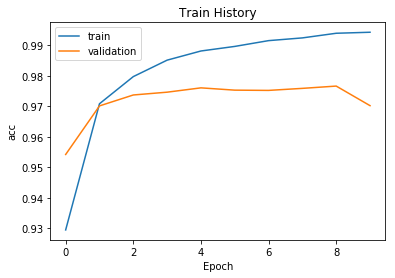

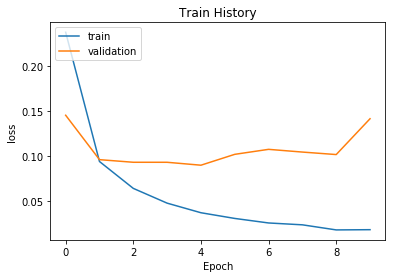

10000/10000 [==============================] - 0s 45us/step

accuracy= 0.9728


In [16]:
# 以圖形顯示訓練過程
show_train_history(train_history,'acc','val_acc')

show_train_history(train_history,'loss','val_loss')

# 評估模型準確率
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

score_1 = scores[1]

## 訓練模型新增兩層
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))  
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_7 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_8 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                2570      
Total params: 335,114
Trainable params: 335,114
Non-trainable params: 0
_________________________________________________________________
None
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 14s 293us/step - loss: 0.2374 - acc: 0.9275 - val_loss: 0.1344 - val_acc: 0.9591
Epoch 2/10
48000/48000 [==============================] - 20s 409us/step -

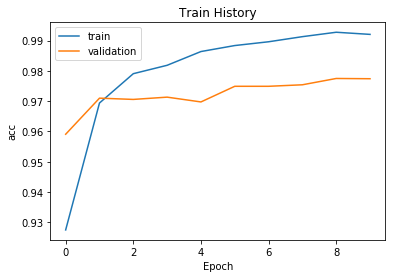

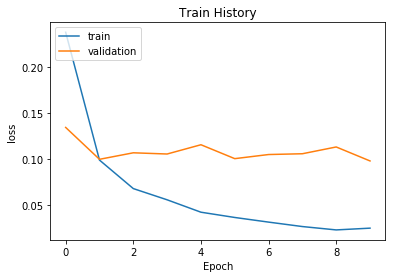

10000/10000 [==============================] - 0s 47us/step

accuracy= 0.979


In [17]:
from keras.layers import Dense, Dropout, Activation, Flatten

#-- 建立模型 -----------------------------

#宣告採用序列模型
model = Sequential()

#建構輸入層
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

#新增2層
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))

#建構輸出層
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))
#model.add(Dense(10))
#model.add(Activation('softmax'))

print(model.summary())

# 訓練模型
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

# 以圖形顯示訓練過程
show_train_history(train_history,'acc','val_acc')

show_train_history(train_history,'loss','val_loss')

# 評估模型準確率
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

score_2 = scores[1]

In [19]:
print(f'original: {score_0}\n+1 layer: {score_1}\n+2 layer: {score_2}')

original: 0.9762
+1 layer: 0.9728
+2 layer: 0.979
